<a href="https://colab.research.google.com/github/Pramodgopinathan/DeepLearning/blob/main/NNDL_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab1: Simple Neural Network (Perceptron)

## Program #1: Implementation of Simple neural network with activation function

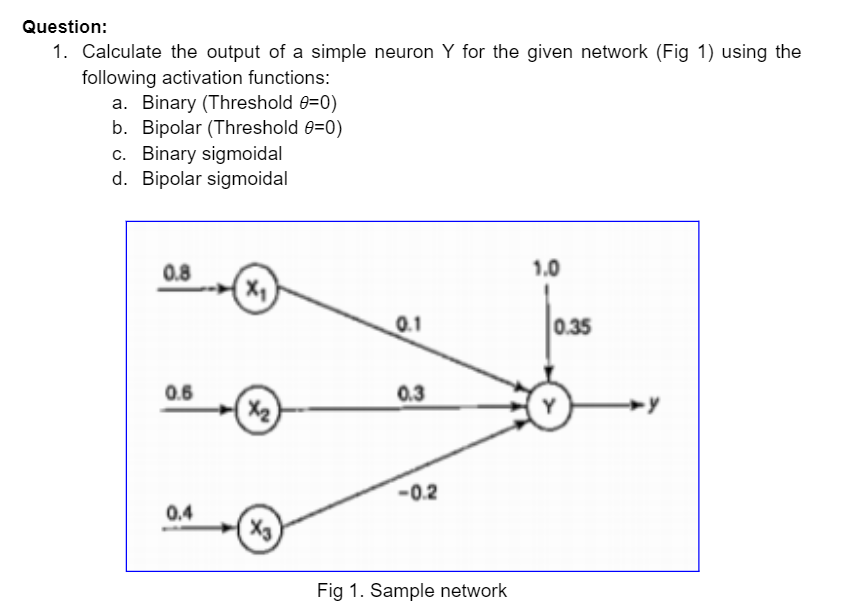






In [ ]:
# we have two parameter one is to identify y or z which is 

# y = (x1 * W1 ) + (x2 * W2) + (x3 * w3) + baise
# n = 3 (as because there are three input nerons givens)

import numpy as np

# Above example x [0.8, 0.6, 0.4], w [0.1,0.3,-0.2] and baise = 0.35

X = np.array([0.8,0.6,0.4])
W = np.array([0.1,0.3,-0.2])
baise = 0.35

print('--------------------------------------------------------------------------------------------') 
print('------------------------Finding Y output ---------------------------------------------------')
print('--------------------------------------------------------------------------------------------')
Y = np.dot(X,W) + baise 
print('The input of a simple neuron Y for the given network is:' , X)
print('The weight of a simple neuron Y for the given network is:' , W)
print('The output of a simple neuron Y for the given network is:' , Y)

# Define in the problem statement 
theta = 0 

def binary_step(y):
      if y < theta:
            return theta
      else:
            return 1

# Define in the problem statement 
theta = 0 

def bipolar_step(y):
      if y < theta:
            return theta
      else:
            return -1

def sigmoid_binary(x):
      return 1/(1 + np.exp(-x))

def sigmoid_bipolar(x):
      return (np.exp(x)-1)/(np.exp(x)+1)

# Activation function = f(Y) 
print('--------------------------------------------------------------------------------------------') 
print('------------------------Activitation Function-----------------------------------------------')
print('--------------------------------------------------------------------------------------------')
binary_step = binary_step(Y)
bipolar_step = bipolar_step(Y)
print('The output of a Y is 0.53 and after coverging with binary step activition function result is:' , binary_step) 
print('The output of a Y is 0.53 and after coverging with bipolar step activition function result is:' , bipolar_step) 
print('The output of a Y is 0.53 and after coverging with sigmoid binary activition function result is:' , sigmoid_binary(Y)) 
print('The output of a Y is 0.53 and after coverging with sigmoid bipolar activition function result is:' , sigmoid_bipolar(Y)) 

--------------------------------------------------------------------------------------------
------------------------Finding Y output ---------------------------------------------------
--------------------------------------------------------------------------------------------
The input of a simple neuron Y for the given network is: [0.8 0.6 0.4]
The weight of a simple neuron Y for the given network is: [ 0.1  0.3 -0.2]
The output of a simple neuron Y for the given network is: 0.53
--------------------------------------------------------------------------------------------
------------------------Activitation Function-----------------------------------------------
--------------------------------------------------------------------------------------------
The output of a Y is 0.53 and after coverging with binary step activition function result is: 1
The output of a Y is 0.53 and after coverging with bipolar step activition function result is: -1
The output of a Y is 0.53 and after cov

## Program 2: Implementation of single output and Multi output  Perceptron Network with activation function

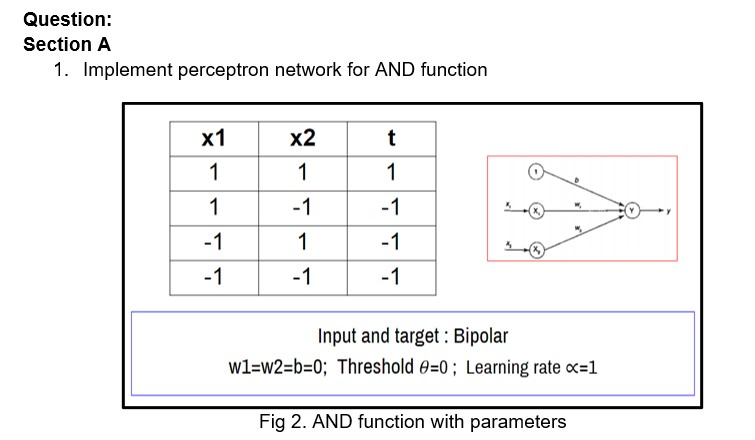

In [ ]:
# for the first input pattern x1 = 1, x2 = 1 and t = 1 with weight and bias w1 = 0, w2 = 0 and b = 0
import numpy as np
#1. Calculate the net input 
def netinput(x1, x2, weight1, weight2, bias):
      Yin = bias + x1*weight1 + x2*weight2
      return Yin

#2. The output y is computed by applying activiations over the net input calculated
def activitionfun(Yin):
      if Yin > 0:
            return 1 
      elif Yin == 0:
            return 0
      else: 
            return -1 

#3. Check whether target is to f_Yin (calculated output of y)
def validation(x1,x2,weight1,weight2,bias, f_Yin, target,aplha):
      
      if target != f_Yin:
      # Change in the weights are: (alpha - learning rate is 1)
            weight1 = weight1 + aplha*target*x1
            weight2 = weight2 + aplha*target*x2
            bias = bias + aplha*target 
      return weight1,weight2,bias

row1 = np.array([[1],[1],[0],[0],[0]])

# Calculate the net input for row 1
Yin = netinput(row1[0][0],row1[1][0],row1[2][0],row1[3][0],row1[4][0])
row1 = np.append(row1,Yin)

# Calcuate the output y using activation function
Y = activitionfun(Yin)
row1 = np.append(row1,Y)

#adding target
target = 1
row1 = np.append(row1,target)

# Check any changes in weights and alpha given is 1 as learning rates
changes = validation(row1[0],row1[1],row1[2],row1[3],row1[4],row1[6],row1[7],1)
row1 = np.append(row1,changes)

import pandas as pd 
df = pd.DataFrame(row1).T

df.rename (columns = {0:'x1',1:'x2',2:'weight1',3:'weight2',4:'bias',5:'Yin (Net Input)'}, inplace=True)
df.rename (columns = {6:'Calculate Ouput (y)',7:'Target'}, inplace=True)
df.rename (columns = {8:'change_weight1',9:'change_weight2',10:'change_bias'}, inplace=True)
df



,x1,x2,weight1,weight2,bias,Yin (Net Input),Calculate Ouput (y),Target,change_weight1,change_weight2,change_bias
0,1,1,0,0,0,0,0,1,1,1,1


In [ ]:
### Trying to get full data set again

import pandas as pd 
import matplotlib.pyplot as plt
import math as math
class ActivationFunctions:
    def __init__(self):
        pass
    @classmethod
    def binary(self, y, theta):

        if y >= theta:
            return 1
        return 0

    def bipolar_step(self, y, theta):

        if y >= theta:
            return 1
        return -1

    def binary_sigmoidal(self, y):

        return 1/(1+math.exp(-y))

    def bipolar_sigmoid(self, y):
        return math.tanh(y)

    def signum(self, y):
        if y<0:
            return -1
        elif y>0:
            return 1
        return 0

def AND_Perceptron(inputs,wt,tgt,epoch,learning_rate,bias,plot=False):
    rows = []
    X_cols = []
    w_cols = []
    ocols = ['bias','Y (Net input)','Calculated Output Y']
    for xi in range(0,inputs.shape[1]):
        X_cols.append(f"X{xi}")
        w_cols.append(f"wt{xi}")
    X_cols.append('Target')
    X_cols.extend(w_cols)
    X_cols.extend(ocols)
    cols=X_cols

    for epoch in range(0,epoch):
        for i in range(0,inputs.shape[0]):
            data = []

            yin = np.dot(inputs[i],wt) + bias
            yout = ActivationFunctions().signum(yin)

            data.extend(inputs[i])
            data.append(tgt[i])
            data.extend(wt)
            data.extend([bias,yin,yout])
            for j in range(0,inputs.shape[1]):
                #print(yout!=tgt[i])
                if yout != tgt[i]:
                    wt[j] = wt[j] + learning_rate*tgt[i]*inputs[i][j]
                    #print(f"W{j}", wt[j])
                    if j+1 == inputs.shape[1]:
                        bias = bias + tgt[i]
                        #print("B",bias)
            rows.append(data)
    #print(rows)
    df = pd.DataFrame(rows, columns=cols)
    
    return df

inputs = np.array([[1,1],[1,-1],[-1,1],[-1,-1]])
w = np.array([0,0])
t = np.array([1,-1,-1,-1])
df = AND_Perceptron(inputs=inputs,wt=w,tgt=t,epoch=2,learning_rate=1,bias=0,plot=True)


df

,X0,X1,Target,wt0,wt1,bias,Y (Net input),Calculated Output Y
0,1,1,1,0,0,0,0,0
1,1,-1,-1,1,1,1,1,1
2,-1,1,-1,0,2,0,2,1
3,-1,-1,-1,1,1,-1,-3,-1
4,1,1,1,1,1,-1,1,1
5,1,-1,-1,1,1,-1,-1,-1
6,-1,1,-1,1,1,-1,-1,-1
7,-1,-1,-1,1,1,-1,-3,-1


# Lab2: ADALINE Network

## Program 1: Implement the classification of OR problem using ADALINE network

Implement the classification of OR problem using ADALINE network


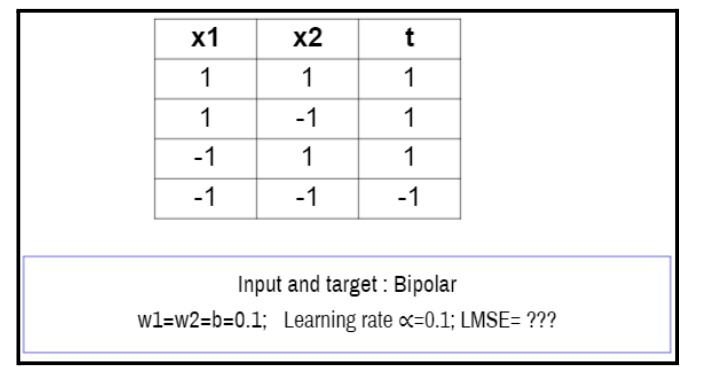

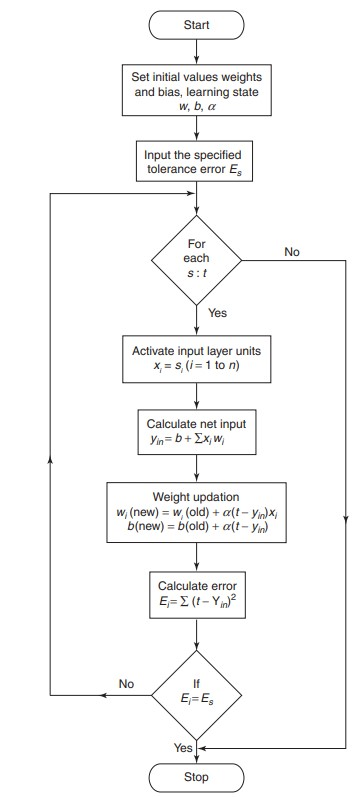

In [ ]:
import numpy as np
import math
import pandas as pd
from tabulate import tabulate




The initial assumptions for weights and bias are:-
1. w1=0.1
2. w2=0.1
3. alpha=0.1

In [ ]:
x1= np.array([1,1,-1,-1])
x2= np.array([1,-1,1,-1])
t= [1,1,1,-1]


error_term_square=[]
error_term_final=[]
yin=[]
w1=0.1
w2=0.1
bias= 0.1
weights_w1=[]
weights_w2=[]
final_bias=[]
  
for i in range(1,6):   
    for i,j,l in zip(x1,x2,t):
    
        yin_cal= bias+ ((i*w1)+(j*w2))
        yin.append(yin_cal)
        
        
        error_term= (l-yin_cal)
        error_term_final.append(error_term)
        
        
        w1=w1+(0.1*(error_term)*i)
        weights_w1.append(w1)
        
        
        w2=w2+(0.1*(error_term)*j)
        weights_w2.append(w2)
        bias=bias+(0.1*error_term)
        final_bias.append(bias)
        
        error_term_square.append(error_term**2)

mse=[sum(error_term_square[0:4]),sum(error_term_square[4:8]),sum(error_term_square[8:12]),sum(error_term_square[12:16]),sum(error_term_square[16:])]
mse


[3.02108749,
 1.9384466295901872,
 1.5493032616885436,
 1.4175108182267264,
 1.3782253674072138]

In [ ]:
df1= pd.DataFrame({'Epochs':[1,2,3,4,5],'Total_Mean_Square': mse})
df1

,Epochs,Total_Mean_Square
0,1,3.021087
1,2,1.938447
2,3,1.549303
3,4,1.417511
4,5,1.378225


In [ ]:
b=[]
for i in range(5):
    for j in x1:
        b.append(j)
c=[]
for i in range(5):
    for j in x2:
        c.append(j)

df2= pd.DataFrame({'X1': b,'X2':c})
df3=pd.DataFrame({'W1':weights_w1,'W2':weights_w2,'Bias': final_bias,'Error_term':error_term_final,'Error_Squared':error_term_square})

z= pd.concat([df2,df3,df1],axis=1)

z= z.replace(np.nan,'-')
z

,X1,X2,W1,W2,Bias,Error_term,Error_Squared,Epochs,Total_Mean_Square
0,1,1,0.170000,0.170000,0.170000,0.700000,0.490000,1.0,3.021087
1,1,-1,0.253000,0.087000,0.253000,0.830000,0.688900,2.0,1.938447
2,-1,1,0.161700,0.178300,0.344300,0.913000,0.833569,3.0,1.549303
3,-1,-1,0.262130,0.278730,0.243870,-1.004300,1.008618,4.0,1.417511
4,1,1,0.283657,0.300257,0.265397,0.215270,0.046341,5.0,1.378225
5,1,-1,0.358777,0.225137,0.340517,0.751203,0.564306,-,-
6,-1,1,0.279465,0.304449,0.419830,0.793123,0.629045,-,-
7,-1,-1,0.363057,0.388041,0.336238,-0.835916,0.698755,-,-
8,1,1,0.354323,0.379307,0.327505,-0.087335,0.007627,-,-
9,1,-1,0.424071,0.309559,0.397252,0.697480,0.486478,-,-


## Program #2: Implement the classification of XOR problem using MADALINE network


Implement the classification of XOR problem using MADALINE network, 

Initial assumptions for the weights and bias are:-
w11=0.05
w12=0.1
w21=0.2
w22=0.2
b1=0.3
b2=0.15
b3=0.5
v1=0.5
v2=0.5

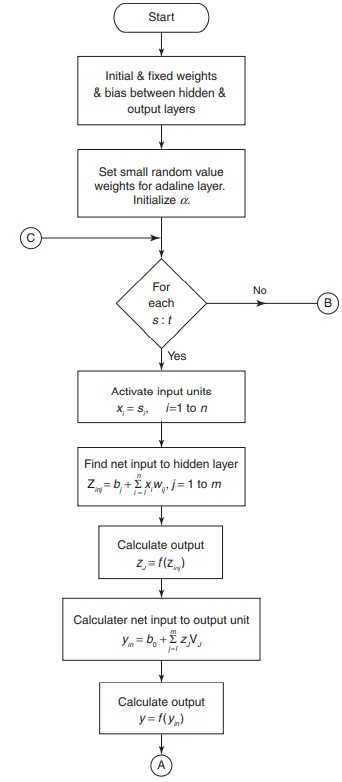





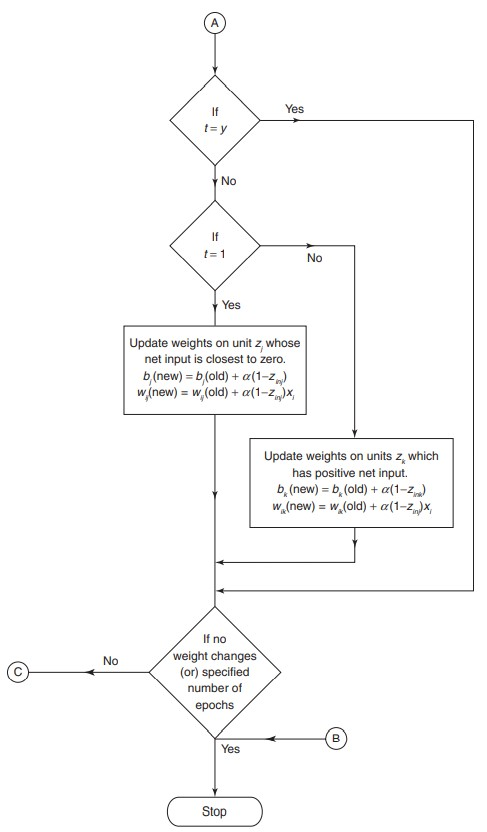

In [ ]:
x1=np.array([1,1,-1,-1])
x2=np.array([1,-1,1,-1])
t=[-1,1,1,-1]

w11=0.05
w12=0.1
w21=0.2
w22=0.2
b1=0.3
b2=0.15
b3=0.5
v1=0.5
v2=0.5
final_y= []
final_w11=[]
final_w12=[]
final_w21=[]
final_w22=[]
final_b1=[]
final_b2=[]
final_zin_1=[]
final_zin_2=[]

def activation_function(x):
    if(x>=0):
        return 1
    else:
        return -1
    
for i in range(3):
    for i,j,l in zip(x1,x2,t):
        # Net input calculation (z1 & z2)
        zin_1= b1+((i*w11)+(j*w21))
        final_zin_1.append(zin_1)
        zin_2= b2+((i*w12)+(j*w22))
        final_zin_2.append(zin_2)
    
        # Activation function
    
        z1= activation_function(zin_1)
        z2=activation_function(zin_2)
    
        # Net input for output node
        y_in= b3+((z1*v1)+(z2*v2))
    
        # Activation function for final output
        y= activation_function(y_in)
        final_y.append(y)
    
        if(y!=l and l==1):
            if(abs(zin_2) <abs(zin_1) or min(abs(zin_1),abs(zin_2))==abs(zin_2)):
                w22= w22+(0.5*(l-zin_2)*j)
                final_w22.append(w22)
                w12 = w12+(0.5*(l-zin_2)*i)
                final_w12.append(w12)
                b2= b2+(0.5*(l-zin_2))
                final_b2.append(b2)
                w11=w11
                final_w11.append(w11)
            
                w21=w21
                final_w21.append(w21)
            
                b1=b1
                final_b1.append(b1)
            
            else:
                w11= w11+(0.5*(l-zin_1)*i)
                final_w11.append(w11)
                w21=w21+(0.5*(l-zin_1)*j)
                final_w21.append(w21)
                b1=b1+(0.5*(l-zin_1)*i)
                final_b1.append(b1)
            
                w22=w22
                final_w22.append(w22)
                w12=w12
                final_w12.append(w12)
                b2=b2
                final_b2.append(b2)
           
            
        
        elif(y!=l and l==-1):
            if(zin_1>0 and zin_2>0):
                w11= w11+(0.5*(l-zin_1)*i)
                final_w11.append(w11)
                
               
                w21= w21+(0.5*(l-zin_1)*j)
                final_w21.append(w21)
                b1= b1+(0.5*(l-zin_1))
                final_b1.append(b1)
            
                w12=w12+(0.5*(l-zin_2)*i)
                final_w12.append(w12)
                
                w22=w22+(0.5*(l-zin_2)*j)
                final_w22.append(w22)
                b2= b2+(0.5*(l-zin_2))
                final_b2.append(b2)
                
            elif(zin_2>0):
                w12=w12+(0.5*(l-zin_2)*i)
                final_w12.append(w12)
                w22=w22+(0.5*(l-zin_2)*j)
                final_w22.append(w22)
                b2= b2+(0.5*(l-zin_2))
                final_b2.append(b2)
                w11=w11
                final_w11.append(w11)
                
                w21=w21
                final_w21.append(w21)
                b1=b1
                final_b1.append(b1)
          
            elif(zin_1>0):
                w11= w11+(0.5*(l-zin_1)*i)
                final_w11.append(w11)
                w21= w21+(0.5*(l-zin_1)*j)
                final_w21.append(w21)
                b1= b1+(0.5*(l-zin_1))
                final_b1.append(b1)
                w22=w22
                final_w22.append(w22)
                w12=w12
                final_w12.append(w12)
                b2=b2
                final_b2.append(b2)
            
                
            
        elif(l==y):
                w11=w11
                final_w11.append(w11)
                w21=w21
                final_w21.append(w21)
                w12=w12
                final_w12.append(w12)
                w22=w22
                final_w22.append(w22)
                b1=b1
                final_b1.append(b1)
                b2=b2
                final_b2.append(b2)
       
s=[]
for i in range(3):
    for j in x1:
        s.append(j)
r=[]
for i in range(3):
    for j in x2:
        r.append(j)
w=[]
for i in range(3):
    for j in t:
        w.append(j)

df_new_1= pd.DataFrame({'X1': s,'X2': r,'T':w})
df_new_1

,X1,X2,T
0,1,1,-1
1,1,-1,1
2,-1,1,1
3,-1,-1,-1
4,1,1,-1
5,1,-1,1
6,-1,1,1
7,-1,-1,-1
8,1,1,-1
9,1,-1,1


In [ ]:
df_new= pd.DataFrame({'Y':final_y,'Zin_1':final_zin_1,'Zin_2': final_zin_2,'W11':final_w11,'W21': final_w21,'b1': final_b1,'W12':final_w12,'W22': final_w22,'b2':final_b2})
df_final_madaline= pd.concat([df_new_1,df_new],axis=1)
df_final_madaline

,X1,X2,T,Y,Zin_1,Zin_2,W11,W21,b1,W12,W22,b2
0,1,1,-1,1,0.550000,0.450000,-0.725000,-0.575000,-0.475000,-0.625000,-0.525000,-0.575000
1,1,-1,1,-1,-0.625000,-0.675000,0.087500,-1.387500,0.337500,-0.625000,-0.525000,-0.575000
2,-1,1,1,-1,-1.137500,-0.475000,0.087500,-1.387500,0.337500,-1.362500,0.212500,0.162500
3,-1,-1,-1,1,1.637500,1.312500,1.406250,-0.068750,-0.981250,-0.206250,1.368750,-0.993750
4,1,1,-1,1,0.356250,0.168750,0.728125,-0.746875,-1.659375,-0.790625,0.784375,-1.578125
5,1,-1,1,-1,-0.184375,-3.153125,1.320312,-1.339062,-1.067187,-0.790625,0.784375,-1.578125
6,-1,1,1,-1,-3.726562,-0.003125,1.320312,-1.339062,-1.067187,-1.292187,1.285938,-1.076563
7,-1,-1,-1,-1,-1.048438,-1.070313,1.320312,-1.339062,-1.067187,-1.292187,1.285938,-1.076563
8,1,1,-1,-1,-1.085937,-1.082812,1.320312,-1.339062,-1.067187,-1.292187,1.285938,-1.076563
9,1,-1,1,1,1.592187,-3.654688,1.320312,-1.339062,-1.067187,-1.292187,1.285938,-1.076563


# Lab3: Implementation of MLP Network (BPN) with one hidden layer

## Program 1: Implement XOR problem using Multilayer Perceptron Network (MLPN)

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def sigmoid(x): # Returns values that sums to one.
 return 1 / (1 + np.exp(-x))
#derivative of sigmoid
def der_sig(x):
 return x*(1 - x)
def accuracy(y_pred, y_true):
 acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
 return acc.mean()
def cost(y, t):
 return ((t - y)**2).sum() / (2*y.size)


In [ ]:
X = np.array([[1, 1],
 [1, 0],
 [0, 1],
 [0, 0]])
t = np.array([[0], 
 [1],
 [1],
 [0]])
lr = 0.1
hidden_size = 2
output_size = 1
results = pd.DataFrame(columns=["mse", "accuracy"])

In [ ]:
num_data, input_size = X.shape

In [ ]:
# initializing weight for the hidden layer
W1 = np.random.random(size=(input_size, hidden_size)) 
# initializing weight for the output layer
W2 = np.random.random(size=(hidden_size , output_size)) 

In [ ]:
print("W1 = ", W1, "\n\n\nW2 = ", W2)

W1 =  [[0.73811652 0.71526564]
 [0.2425563  0.80816107]] 


W2 =  [[0.73474302]
 [0.2430053 ]]


In [ ]:
epoch = 10000
for n in range(epoch):
 
 #print("\nInput ", n+1)
 
 
 #feed foward
 #input to hidden
 hidden_in = np.dot(X, W1) 
 hidden_out = sigmoid(hidden_in)
 #print("\nhidden out = ", hidden_out)
 
 #hidden to output
 output_in = np.dot(hidden_out, W2) 
 output_out = sigmoid(output_in)
 #print("\noutput out = ", output_out)
 
 total_cost = cost(output_out, t)
 BPN_error = t - output_out
 #print("\nBPN error = ", BPN_error)
 
 acc = accuracy(output_out, t)
 results=results.append({"mse":total_cost, "accuracy":acc},ignore_index=True )
 
 #BACKPROPAGATION
 
 
 
 output_error = (-BPN_error) * der_sig(output_out)
 output_delta = np.dot(output_out.T, output_error ) 
 #print("\nOutput delta = ", output_delta)
 
 hidden_error = np.dot(output_error, W2.T)
 #print("\nHidden error = ", hidden_error)
 
 hidden_delta = np.dot(X.T, hidden_error * der_sig(hidden_out))
 #print("\nHidden delta = ", hidden_delta)
 
 
 # update weights
 #W2 += lr * hidden_out.T.dot(output_delta)
 W2 -= lr * output_delta
 #print("\nW2 = ", W2)
 #b2 += np.sum(output_delta,axis=0,keepdims=True) * lr
 
 #W1 += lr * np.dot(hidden_delta.T, X)
 W1 -= lr * hidden_delta
 #print("\nW1 = ", W1)
 #b1 += lr * hidden_delta
 #print("---------------------------")
 
print("Final output weights = ", W2)
print("\nFinal input weights = ", W1)


Final output weights =  [[ 0.20961721]
 [-0.28212051]]

Final input weights =  [[2.59752072 0.12942183]
 [2.55264075 0.33980013]]


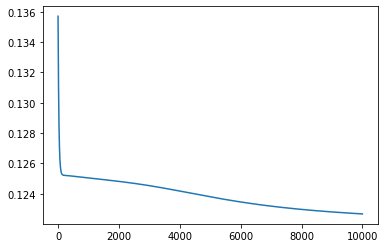

In [ ]:
results.mse.plot()

# Lab 4: MLP with multiple hidden layers

### Example

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv('/content/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
#Build a MLP architecture with two or more hidden layers
#Use any open data set from kaggle or public forum
#Perform train, validation and test split of data set
#Compute the cost for all epochs and plot (either MSE or accuracy) (refer fig)

X= data.loc[:, data.columns != 'Outcome']
y= data['Outcome']
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [4]:
# Import MLPClassifer 
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01,
                   max_iter=10)

# Fit data onto the model
clf.fit(X_train,y_train)

Iteration 1, loss = 3.50268808
Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01, max_iter=10,
              random_state=5, verbose=True)

In [5]:
# Make prediction on test dataset
ypred=clf.predict(X_test)

# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(y_test,ypred)

0.670995670995671

Hence the accuracy score is 67.09%% for the following parameters:-
2 hidden layers(with 6 and 5 neurons respectively) and learning rate =0.01

In [6]:
### Plotting epochs vs mse
print(y.shape,ypred.shape)


(768,) (231,)


In [7]:
from sklearn.metrics import mean_squared_error
  

mean_squared_error(y_test,ypred)

0.329004329004329

In [8]:
epochs= [i for i in range(1,200)]
mse_test=[]
accuracy_test=[]
accuracy_train=[]
mse_train=[]
for i in epochs:
    clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01,
                   max_iter=i)
    clf.fit(X_train,y_train)
    ypred1=clf.predict(X_test)
    ypred2=clf.predict(X_train)
    
    c= (accuracy_score(y_test,ypred1))
    accuracy_test.append(c)
    d= mean_squared_error(y_test,ypred1)
    mse_test.append(d)
    e= (accuracy_score(y_train,ypred2))
    accuracy_train.append(e)
    f= mean_squared_error(y_train,ypred2)
    mse_train.append(f)

Iteration 1, loss = 3.50268808
Iteration 1, loss = 3.50268808
Iteration 2, loss = 2.51544592
Iteration 1, loss = 3.50268808
Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 1, loss = 3.50268808
Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteration 1, loss = 3.50268808
Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 1, loss = 3.50268808
Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 1, loss = 3.50268808
Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 1, loss = 3.50268808
Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: Con

Iteration 1, loss = 3.50268808
Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 1, loss = 3.50268808
Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 1, loss = 3.50268808
Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Ite

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (11) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (13) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (14) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692:

Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 1, loss = 3.50268808
Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 1, loss = 3.50268808
Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (16) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (17) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (18) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (19) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 1, loss = 3.50268808
Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (21) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (22) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 22, loss = 0.61188207
Iteration 1, loss = 3.50268808
Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 1, loss = 3.50268808
Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.8

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (23) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (24) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 1, loss = 3.50268808
Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (26) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (27) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (28) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 1, loss = 3.50268808
Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (29) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (31) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 1, loss = 3.50268808
Iteration 2, loss = 2.51544592
Iteration 3, loss

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (33) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 1, loss = 3.50268808
Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (37) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 1, loss = 3.50268808
Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (38) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (39) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 1, loss = 3.50268808
Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (41) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteration 41, loss = 0.56922624
Iteration 1, loss = 3.50268808
Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (42) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (43) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteration 41, loss = 0.56922624
Iteration 42, loss = 0.56347394
Iteration 43, loss = 0.55505760
Iteration 1, loss = 3.50268808
Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (44) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (45) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (46) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (47) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteration 41, loss = 0.56922624
Iteration 42, loss = 0.56347394
Iteration 43, loss = 0.55505760
Iteration 44, loss = 0.55756140
Iteration 45, loss = 0.55256821
Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 1, loss = 3.50268808
Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (48) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (49) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, lo

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (51) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteration 41, loss = 0.56922624
Iteration 42, loss = 0.56347394
Iteration 43, loss = 0.55505760
Iteration 44, loss = 0.55756140
Iteration 45, loss = 0.55256821
Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 1, loss = 3.50268808
Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (52) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (53) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, lo

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (54) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (55) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 1, loss = 3.50268808
Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (56) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (57) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteration 41, loss = 0.56922624
Iteration 42, loss = 0.56347394
Iteration 43, loss = 0.55505760
Iteration 44, loss = 0.55756140
Iteration 45, loss = 0.55256821
Iteration 46, loss = 0.55136219
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (58) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (59) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 1, loss = 3.50268808
Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (61) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (62) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (63) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 45, loss = 0.55256821
Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 1, loss = 3.50268808
Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (64) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (65) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36,

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (66) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (67) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteration 41, loss = 0.56922624
Iteration 42, loss = 0.56347394
Iteration 43, loss = 0.55505760
Iteration 44, loss = 0.55756140
Iteration 45, loss = 0.55256821
Iteration 46, loss = 0.55136219
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (68) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (69) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteration 41, loss = 0.56922624
Iteration 42, loss = 0.56347394
Iteration 43, loss = 0.55505760
Iteration 44, loss = 0.55756140
Iteration 45, loss = 0.55256821
Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (71) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 1, loss = 3.50268808
Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (72) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (73) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 3.50268808
Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (74) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (76) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (77) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (78) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteration 41, loss = 0.56922624
Iteration 42, loss = 0.56347394
Iteration 43, loss = 0.55505760
Iteration 44, loss = 0.55756140
Iteration 45, loss = 0.55256821
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (79) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, 

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (81) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 3.50268808
Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (82) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 3.50268808
Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (83) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteration 76, loss = 0.51088763
Iteration 77, loss = 0.50603925
Iteration 78, loss = 0.50607648
Iteration 79, loss = 0.50529983
Iteration 80, loss = 0.50354887
Iteration 81, loss = 0.50428741
Iteration 82, loss = 0.50243426
Iteration 83, loss = 0.50009380
Iteration 84, loss = 0.49909041
Iteration 1, loss = 3.50268808
Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (84) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteration 76, loss = 0.51088763
Iteration 77, loss = 0.50603925
Iteration 78, loss = 0.50607648
Iteration 79, loss = 0.50529983
Iteration 80, loss = 0.50354887
Iteration 81, loss = 0.50428741
Iteration 82, loss = 0.50243426
Iteration 83, loss = 0.50009380
Iteration 84, loss = 0.49909041
Iteration 85, loss = 0.49986642
Iteration 1, loss = 3.50268808
Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, lo

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (85) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteration 76, loss = 0.51088763
Iteration 77, loss = 0.50603925
Iteration 78, loss = 0.50607648
Iteration 79, loss = 0.50529983
Iteration 80, loss = 0.50354887
Iteration 81, loss = 0.50428741
Iteration 82, loss = 0.50243426
Iteration 83, loss = 0.50009380
Iteration 84, loss = 0.49909041
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (86) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteration 76, loss = 0.51088763
Iteration 77, loss = 0.50603925
Iteration 78, loss = 0.50607648
Iteration 79, loss = 0.50529983
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (87) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteration 41, loss = 0.56922624
Iteration 42, loss = 0.56347394
Iteration 43, loss = 0.55505760
Iteration 44, loss = 0.55756140
Iteration 45, loss = 0.55256821
Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (88) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteration 41, loss = 0.56922624
Iteration 42, loss = 0.56347394
Iteration 43, loss = 0.55505760
Iteration 44, loss = 0.55756140
Iteration 45, loss = 0.55256821
Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (89) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36,

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (90) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 78, loss = 0.50607648
Iteration 79, loss = 0.50529983
Iteration 80, loss = 0.50354887
Iteration 81, loss = 0.50428741
Iteration 82, loss = 0.50243426
Iteration 83, loss = 0.50009380
Iteration 84, loss = 0.49909041
Iteration 85, loss = 0.49986642
Iteration 86, loss = 0.49930802
Iteration 87, loss = 0.49795232
Iteration 88, loss = 0.49656583
Iteration 89, loss = 0.49513752
Iteration 90, loss = 0.49432006
Iteration 91, loss = 0.49318764
Iteration 1, loss = 3.50268808
Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (91) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteration 76, loss = 0.51088763
Iteration 77, loss = 0.50603925
Iteration 78, loss = 0.50607648
Iteration 79, loss = 0.50529983
Iteration 80, loss = 0.50354887
Iteration 81, loss = 0.50428741
Iteration 82, loss = 0.50243426
Iteration 83, loss = 0.50009380
Iteration 84, loss = 0.49909041
Iteration 85, loss = 0.49986642
Iteration 86, loss = 0.49930802
Iteration 87, loss = 0.49795232
Iteration 88, loss = 0.49656583
Iteration 89, loss = 0.49513752
Iteration 90, loss = 0.49432006
Iteration 91, loss = 0.49318764
Iteration 92, loss = 0.49388662
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (92) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteration 76, loss = 0.51088763
Iteration 77, loss = 0.50603925
Iteration 78, loss = 0.50607648
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (93) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteration 41, loss = 0.56922624
Iteration 42, loss = 0.56347394
Iteration 43, loss = 0.55505760
Iteration 44, loss = 0.55756140
Iteration 45, loss = 0.55256821
Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (94) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteration 41, loss = 0.56922624
Iteration 42, loss = 0.56347394
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (95) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 3.50268808
Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (96) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteration 76, loss = 0.51088763
Iteration 77, loss = 0.50603925
Iteration 78, loss = 0.50607648
Iteration 79, loss = 0.50529983
Iteration 80, loss = 0.50354887
Iteration 81, loss = 0.50428741
Iteration 82, loss = 0.50243426
Iteration 83, loss = 0.50009380
Iteration 84, loss = 0.49909041
Iteration 85, loss = 0.49986642
Iteration 86, loss = 0.49930802
Iteration 87, loss = 0.49795232
Iteration 88, loss = 0.49656583
Iteration 89, loss = 0.49513752
Iteration 90, loss = 0.49432006
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (97) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteration 76, loss = 0.51088763
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (98) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteration 41, loss = 0.56922624
Iteration 42, loss = 0.56347394
Iteration 43, loss = 0.55505760
Iteration 44, loss = 0.55756140
Iteration 45, loss = 0.55256821
Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (99) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteration 76, loss = 0.51088763
Iteration 77, loss = 0.50603925
Iteration 78, loss = 0.50607648
Iteration 79, loss = 0.50529983
Iteration 80, loss = 0.50354887
Iteration 81, loss = 0.50428741
Iteration 82, loss = 0.50243426
Iteration 83, loss = 0.50009380
Iteration 84, loss = 0.49909041
Iteration 85, loss = 0.49986642
Iteration 86, loss = 0.49930802
Iteration 87, loss = 0.49795232
Iteration 88, loss = 0.49656583
Iteration 89, loss = 0.49513752
Iteration 90, loss = 0.49432006
Iteration 91, loss = 0.49318764
Iteration 92, loss = 0.49388662
Iteration 93, loss = 0.49511804
Iteration 94, loss = 0.49266226
Iteration 95, loss = 0.49101997
Iteration 96, loss = 0.48995940
Iteration 97, loss = 0.49141925
Iteration 98, loss = 0.48784781
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (101) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 42, loss = 0.56347394
Iteration 43, loss = 0.55505760
Iteration 44, loss = 0.55756140
Iteration 45, loss = 0.55256821
Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (102) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteration 41, loss = 0.56922624
Iteration 42, loss = 0.56347394
Iteration 43, loss = 0.55505760
Iteration 44, loss = 0.55756140
Iteration 45, loss = 0.55256821
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (103) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteration 76, loss = 0.51088763
Iteration 77, loss = 0.50603925
Iteration 78, loss = 0.50607648
Iteration 79, loss = 0.50529983
Iteration 80, loss = 0.50354887
Iteration 81, loss = 0.50428741
Iteration 82, loss = 0.50243426
Iteration 83, loss = 0.50009380
Iteration 84, loss = 0.49909041
Iteration 85, loss = 0.49986642
Iteration 86, loss = 0.49930802
Iteration 87, loss = 0.49795232
Iteration 88, loss = 0.49656583
Iteration 89, loss = 0.49513752
Iteration 90, loss = 0.49432006
Iteration 91, loss = 0.49318764
Iteration 92, loss = 0.49388662
Iteration 93, loss = 0.49511804
Iteration 94, loss = 0.49266226
Iteration 95, loss = 0.49101997
Iteration 96, loss = 0.48995940
Iteration 97, loss = 0.49141925
Iteration 98, loss = 0.48784781
Iteration 99, loss = 0.48777309
Iteration 100, loss = 0.48516804
Iteration 101, loss = 0.48705625
Iterat

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (104) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 44, loss = 0.55756140
Iteration 45, loss = 0.55256821
Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteration 74, loss = 0.51227327
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (105) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteration 41, loss = 0.56922624
Iteration 42, loss = 0.56347394
Iteration 43, loss = 0.55505760
Iteration 44, loss = 0.55756140
Iteration 45, loss = 0.55256821
Iteration 46, loss = 0.55136219
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (106) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteration 76, loss = 0.51088763
Iteration 77, loss = 0.50603925
Iteration 78, loss = 0.50607648
Iteration 79, loss = 0.50529983
Iteration 80, loss = 0.50354887
Iteration 81, loss = 0.50428741
Iteration 82, loss = 0.50243426
Iteration 83, loss = 0.50009380
Iteration 84, loss = 0.49909041
Iteration 85, loss = 0.49986642
Iteration 86, loss = 0.49930802
Iteration 87, loss = 0.49795232
Iteration 88, loss = 0.49656583
Iteration 89, loss = 0.49513752
Iteration 90, loss = 0.49432006
Iteration 91, loss = 0.49318764
Iteration 92, loss = 0.49388662
Iteration 93, loss = 0.49511804
Iteration 94, loss = 0.49266226
Iteration 95, loss = 0.49101997
Iteration 96, loss = 0.48995940
Iteration 97, loss = 0.49141925
Iteration 98, loss = 0.48784781
Iteration 99, loss = 0.48777309
Iteration 100, loss = 0.48516804
Iteration 101, loss = 0.48705625
Iteration 102, loss = 0.48266380
Iteration 103, loss = 0.48471847
Iteration 104, loss = 0.48308483
Ite

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (107) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteration 41, loss = 0.56922624
Iteration 42, loss = 0.56347394
Iteration 43, loss = 0.55505760
Iteration 44, loss = 0.55756140
Iteration 45, loss = 0.55256821
Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (108) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (109) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteration 76, loss = 0.51088763
Iteration 77, loss = 0.50603925
Iteration 78, loss = 0.50607648
Iteration 79, loss = 0.50529983
Iteration 80, loss = 0.50354887
Iteration 81, loss = 0.50428741
Iteration 82, loss = 0.50243426
Iteration 83, loss = 0.50009380
Iteration 84, loss = 0.49909041
Iteration 85, loss = 0.49986642
Iteration 86, loss = 0.49930802
Iteration 87, loss = 0.49795232
Iteration 88, loss = 0.49656583
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (110) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteration 41, loss = 0.56922624
Iteration 42, loss = 0.56347394
Iteration 43, loss = 0.55505760
Iteration 44, loss = 0.55756140
Iteration 45, loss = 0.55256821
Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (111) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteration 76, loss = 0.51088763
Iteration 77, loss = 0.50603925
Iteration 78, loss = 0.50607648
Iteration 79, loss = 0.50529983
Iteration 80, loss = 0.50354887
Iteration 81, loss = 0.50428741
Iteration 82, loss = 0.50243426
Iteration 83, loss = 0.50009380
Iteration 84, loss = 0.49909041
Iteration 85, loss = 0.49986642
Iteration 86, loss = 0.49930802
Iteration 87, loss = 0.49795232
Iteration 88, loss = 0.49656583
Iteration 89, loss = 0.49513752
Iteration 90, loss = 0.49432006
Iteration 91, loss = 0.49318764
Iteration 92, loss = 0.49388662
Iteration 93, loss = 0.49511804
Iteration 94, loss = 0.49266226
Iteration 95, loss = 0.49101997
Iteration 96, loss = 0.48995940
Iteration 97, loss = 0.49141925
Iteration 98, loss = 0.48784781
Iteration 99, loss = 0.48777309
Iteration 100, loss = 0.48516804
Iteration 101, loss = 0.48705625
Iteration 102, loss = 0.48266380
Iter

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (112) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteration 41, loss = 0.56922624
Iteration 42, loss = 0.56347394
Iteration 43, loss = 0.55505760
Iteration 44, loss = 0.55756140
Iteration 45, loss = 0.55256821
Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (113) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteration 76, loss = 0.51088763
Iteration 77, loss = 0.50603925
Iteration 78, loss = 0.50607648
Iteration 79, loss = 0.50529983
Iteration 80, loss = 0.50354887
Iteration 81, loss = 0.50428741
Iteration 82, loss = 0.50243426
Iteration 83, loss = 0.50009380
Iteration 84, loss = 0.49909041
Iteration 85, loss = 0.49986642
Iteration 86, loss = 0.49930802
Iteration 87, loss = 0.49795232
Iteration 88, loss = 0.49656583
Iteration 89, loss = 0.49513752
Iteration 90, loss = 0.49432006
Iteration 91, loss = 0.49318764
Iteration 92, loss = 0.49388662
Iteration 93, loss = 0.49511804
Iteration 94, loss = 0.49266226
Iteration 95, loss = 0.49101997
Iteration 96, loss = 0.48995940
Iteration 97, loss = 0.49141925
Iteration 98, loss = 0.48784781
Iteration 99, loss = 0.48777309
Iteration 100, loss = 0.48516804
Iteration 101, loss = 0.48705625
Iteration 102, loss = 0.48266380
Iteration 103, loss = 0.48471847
Iteration 104, loss = 0.48308483
Ite

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (114) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 41, loss = 0.56922624
Iteration 42, loss = 0.56347394
Iteration 43, loss = 0.55505760
Iteration 44, loss = 0.55756140
Iteration 45, loss = 0.55256821
Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (115) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, l

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (116) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteration 76, loss = 0.51088763
Iteration 77, loss = 0.50603925
Iteration 78, loss = 0.50607648
Iteration 79, loss = 0.50529983
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (117) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteration 41, loss = 0.56922624
Iteration 42, loss = 0.56347394
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (118) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteration 76, loss = 0.51088763
Iteration 77, loss = 0.50603925
Iteration 78, loss = 0.50607648
Iteration 79, loss = 0.50529983
Iteration 80, loss = 0.50354887
Iteration 81, loss = 0.50428741
Iteration 82, loss = 0.50243426
Iteration 83, loss = 0.50009380
Iteration 84, loss = 0.49909041
Iteration 85, loss = 0.49986642
Iteration 86, loss = 0.49930802
Iteration 87, loss = 0.49795232
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (119) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteration 41, loss = 0.56922624
Iteration 42, loss = 0.56347394
Iteration 43, loss = 0.55505760
Iteration 44, loss = 0.55756140
Iteration 45, loss = 0.55256821
Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteration 76, loss = 0.51088763
Iteration 77, loss = 0.50603925
Iteration 78, loss = 0.50607648
Iteration 79, loss = 0.50529983
Iteration 80, loss = 0.50354887
Iteration 81, loss = 0.50428741
Iteration 82, loss = 0.50243426
Iteration 83, loss = 0.50009380
Iteration 84, loss = 0.49909041
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (121) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteration 41, loss = 0.56922624
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (122) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteration 76, loss = 0.51088763
Iteration 77, loss = 0.50603925
Iteration 78, loss = 0.50607648
Iteration 79, loss = 0.50529983
Iteration 80, loss = 0.50354887
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (123) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36,

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (124) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteration 76, loss = 0.51088763
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (125) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 3.50268808
Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (126) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteration 41, loss = 0.56922624
Iteration 42, loss = 0.56347394
Iteration 43, loss = 0.55505760
Iteration 44, loss = 0.55756140
Iteration 45, loss = 0.55256821
Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (127) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteration 76, loss = 0.51088763
Iteration 77, loss = 0.50603925
Iteration 78, loss = 0.50607648
Iteration 79, loss = 0.50529983
Iteration 80, loss = 0.50354887
Iteration 81, loss = 0.50428741
Iteration 82, loss = 0.50243426
Iteration 83, loss = 0.50009380
Iteration 84, loss = 0.49909041
Iteration 85, loss = 0.49986642
Iteration 86, loss = 0.49930802
Iteration 87, loss = 0.49795232
Iteration 88, loss = 0.49656583
Iteration 89, loss = 0.49513752
Iteration 90, loss = 0.49432006
Iteration 91, loss = 0.49318764
Iteration 92, loss = 0.49388662
Iteration 93, loss = 0.49511804
Iteration 94, loss = 0.49266226
Iteration 95, loss = 0.49101997
Iteration 96, loss = 0.48995940
Iteration 97, loss = 0.49141925
Iteration 98, loss = 0.48784781
Iteration 99, loss = 0.48777309
Iteration 100, loss = 0.48516804
Iteration 101, loss = 0.48705625
Iterat

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (128) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteration 41, loss = 0.56922624
Iteration 42, loss = 0.56347394
Iteration 43, loss = 0.55505760
Iteration 44, loss = 0.55756140
Iteration 45, loss = 0.55256821
Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (129) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteration 76, loss = 0.51088763
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 77, loss = 0.50603925
Iteration 78, loss = 0.50607648
Iteration 79, loss = 0.50529983
Iteration 80, loss = 0.50354887
Iteration 81, loss = 0.50428741
Iteration 82, loss = 0.50243426
Iteration 83, loss = 0.50009380
Iteration 84, loss = 0.49909041
Iteration 85, loss = 0.49986642
Iteration 86, loss = 0.49930802
Iteration 87, loss = 0.49795232
Iteration 88, loss = 0.49656583
Iteration 89, loss = 0.49513752
Iteration 90, loss = 0.49432006
Iteration 91, loss = 0.49318764
Iteration 92, loss = 0.49388662
Iteration 93, loss = 0.49511804
Iteration 94, loss = 0.49266226
Iteration 95, loss = 0.49101997
Iteration 96, loss = 0.48995940
Iteration 97, loss = 0.49141925
Iteration 98, loss = 0.48784781
Iteration 99, loss = 0.48777309
Iteration 100, loss = 0.48516804
Iteration 101, loss = 0.48705625
Iteration 102, loss = 0.48266380
Iteration 103, loss = 0.48471847
Iteration 104, loss = 0.48308483
Iteration 105, loss = 0.48390210
Iteration 106, loss = 0.49089954
Iteration 107, loss = 0.48550391


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (131) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteration 41, loss = 0.56922624
Iteration 42, loss = 0.56347394
Iteration 43, loss = 0.55505760
Iteration 44, loss = 0.55756140
Iteration 45, loss = 0.55256821
Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (132) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteration 76, loss = 0.51088763
Iteration 77, loss = 0.50603925
Iteration 78, loss = 0.50607648
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (133) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteration 76, loss = 0.51088763
Iteration 77, loss = 0.50603925
Iteration 78, loss = 0.50607648
Iteration 79, loss = 0.50529983
Iteration 80, loss = 0.50354887
Iteration 81, loss = 0.50428741
Iteration 82, loss = 0.50243426
Iteration 83, loss = 0.50009380
Iteration 84, loss = 0.49909041
Iteration 85, loss = 0.49986642
Iteration 86, loss = 0.49930802
Iteration 87, loss = 0.49795232
Iteration 88, loss = 0.49656583
Iteration 89, loss = 0.49513752
Iteration 90, loss = 0.49432006
Iteration 91, loss = 0.49318764
Iteration 92, loss = 0.49388662
Iteration 93, loss = 0.49511804
Iteration 94, loss = 0.49266226
Iteration 95, loss = 0.49101997
Iteration 96, loss = 0.48995940
Iteration 97, loss = 0.49141925
Iteration 98, loss = 0.48784781
Iteration 99, loss = 0.48777309
Iteration 100, loss = 0.48516804
Iteration 101, loss = 0.48705625
Iterat

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (134) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteration 41, loss = 0.56922624
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (135) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteration 41, loss = 0.56922624
Iteration 42, loss = 0.56347394
Iteration 43, loss = 0.55505760
Iteration 44, loss = 0.55756140
Iteration 45, loss = 0.55256821
Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (136) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 42, loss = 0.56347394
Iteration 43, loss = 0.55505760
Iteration 44, loss = 0.55756140
Iteration 45, loss = 0.55256821
Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (137) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteration 76, loss = 0.51088763
Iteration 77, loss = 0.50603925
Iteration 78, loss = 0.50607648
Iteration 79, loss = 0.50529983
Iteration 80, loss = 0.50354887
Iteration 81, loss = 0.50428741
Iteration 82, loss = 0.50243426
Iteration 83, loss = 0.50009380
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (138) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteration 76, loss = 0.51088763
Iteration 77, loss = 0.50603925
Iteration 78, loss = 0.50607648
Iteration 79, loss = 0.50529983
Iteration 80, loss = 0.50354887
Iteration 81, loss = 0.50428741
Iteration 82, loss = 0.50243426
Iteration 83, loss = 0.50009380
Iteration 84, loss = 0.49909041
Iteration 85, loss = 0.49986642
Iteration 86, loss = 0.49930802
Iteration 87, loss = 0.49795232
Iteration 88, loss = 0.49656583
Iteration 89, loss = 0.49513752
Iteration 90, loss = 0.49432006
Iteration 91, loss = 0.49318764
Iteration 92, loss = 0.49388662
Iteration 93, loss = 0.49511804
Iteration 94, loss = 0.49266226
Iteration 95, loss = 0.49101997
Iteration 96, loss = 0.48995940
Iteration 97, loss = 0.49141925
Iteration 98, loss = 0.48784781
Iteration 99, loss = 0.48777309
Iteration 100, loss = 0.48516804
Iterati

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (139) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, 

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (140) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteration 41, loss = 0.56922624
Iteration 42, loss = 0.56347394
Iteration 43, loss = 0.55505760
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (141) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteration 41, loss = 0.56922624
Iteration 42, loss = 0.56347394
Iteration 43, loss = 0.55505760
Iteration 44, loss = 0.55756140
Iteration 45, loss = 0.55256821
Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (142) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteration 41, loss = 0.56922624
Iteration 42, loss = 0.56347394
Iteration 43, loss = 0.55505760
Iteration 44, loss = 0.55756140
Iteration 45, loss = 0.55256821
Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (143) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteration 41, loss = 0.56922624
Iteration 42, loss = 0.56347394
Iteration 43, loss = 0.55505760
Iteration 44, loss = 0.55756140
Iteration 45, loss = 0.55256821
Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (144) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 43, loss = 0.55505760
Iteration 44, loss = 0.55756140
Iteration 45, loss = 0.55256821
Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (145) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 42, loss = 0.56347394
Iteration 43, loss = 0.55505760
Iteration 44, loss = 0.55756140
Iteration 45, loss = 0.55256821
Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (146) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteration 41, loss = 0.56922624
Iteration 42, loss = 0.56347394
Iteration 43, loss = 0.55505760
Iteration 44, loss = 0.55756140
Iteration 45, loss = 0.55256821
Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (147) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 2, loss = 2.51544592
Iteration 3, loss = 1.88134983
Iteration 4, loss = 1.49278940
Iteration 5, loss = 1.33966138
Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, l

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (148) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteration 41, loss = 0.56922624
Iteration 42, loss = 0.56347394
Iteration 43, loss = 0.55505760
Iteration 44, loss = 0.55756140
Iteration 45, loss = 0.55256821
Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (149) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 42, loss = 0.56347394
Iteration 43, loss = 0.55505760
Iteration 44, loss = 0.55756140
Iteration 45, loss = 0.55256821
Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 6, loss = 1.11791867
Iteration 7, loss = 0.95353581
Iteration 8, loss = 0.88832868
Iteration 9, loss = 0.82566624
Iteration 10, loss = 0.77463976
Iteration 11, loss = 0.72384017
Iteration 12, loss = 0.65873405
Iteration 13, loss = 0.67236608
Iteration 14, loss = 0.67852332
Iteration 15, loss = 0.66290119
Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 3

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (151) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteration 41, loss = 0.56922624
Iteration 42, loss = 0.56347394
Iteration 43, loss = 0.55505760
Iteration 44, loss = 0.55756140
Iteration 45, loss = 0.55256821
Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (152) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteration 76, loss = 0.51088763
Iteration 77, loss = 0.50603925
Iteration 78, loss = 0.50607648
Iteration 79, loss = 0.50529983
Iteration 80, loss = 0.50354887
Iteration 81, loss = 0.50428741
Iteration 82, loss = 0.50243426
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (153) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 45, loss = 0.55256821
Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (154) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteration 76, loss = 0.51088763
Iteration 77, loss = 0.50603925
Iteration 78, loss = 0.50607648
Iteration 79, loss = 0.50529983
Iteration 80, loss = 0.50354887
Iteration 81, loss = 0.50428741
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (155) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteration 76, loss = 0.51088763
Iteration 77, loss = 0.50603925
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (156) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteration 76, loss = 0.51088763
Iteration 77, loss = 0.50603925
Iteration 78, loss = 0.50607648
Iteration 79, loss = 0.50529983
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (157) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteration 76, loss = 0.51088763
Iteration 77, loss = 0.50603925
Iteration 78, loss = 0.50607648
Iteration 79, loss = 0.50529983
Iteration 80, loss = 0.50354887
Iteration 81, loss = 0.50428741
Iteration 82, loss = 0.50243426
Iteration 83, loss = 0.50009380
Iteration 84, loss = 0.49909041
Iteration 85, loss = 0.49986642
Iteration 86, loss = 0.49930802
Iteration 87, loss = 0.49795232
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (158) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteration 76, loss = 0.51088763
Iteration 77, loss = 0.50603925
Iteration 78, loss = 0.50607648
Iteration 79, loss = 0.50529983
Iteration 80, loss = 0.50354887
Iteration 81, loss = 0.50428741
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (159) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteration 76, loss = 0.51088763
Iteration 77, loss = 0.50603925
Iteration 78, loss = 0.50607648
Iteration 79, loss = 0.50529983
Iteration 80, loss = 0.50354887
Iteration 81, loss = 0.50428741
Iteration 82, loss = 0.50243426
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (160) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 45, loss = 0.55256821
Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (161) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteration 41, loss = 0.56922624
Iteration 42, loss = 0.56347394
Iteration 43, loss = 0.55505760
Iteration 44, loss = 0.55756140
Iteration 45, loss = 0.55256821
Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iterati

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (162) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteration 76, loss = 0.51088763
Iteration 77, loss = 0.50603925
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (163) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteration 76, loss = 0.51088763
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (164) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteration 41, loss = 0.56922624
Iteration 42, loss = 0.56347394
Iteration 43, loss = 0.55505760
Iteration 44, loss = 0.55756140
Iteration 45, loss = 0.55256821
Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (165) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 16, loss = 0.63247044
Iteration 17, loss = 0.64852641
Iteration 18, loss = 0.63009972
Iteration 19, loss = 0.60671224
Iteration 20, loss = 0.62711716
Iteration 21, loss = 0.61267642
Iteration 22, loss = 0.61188207
Iteration 23, loss = 0.59994722
Iteration 24, loss = 0.60144127
Iteration 25, loss = 0.59390700
Iteration 26, loss = 0.59356292
Iteration 27, loss = 0.59034321
Iteration 28, loss = 0.58489237
Iteration 29, loss = 0.58622369
Iteration 30, loss = 0.58559266
Iteration 31, loss = 0.57726480
Iteration 32, loss = 0.57912590
Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteration 41, loss = 0.56922624
Iteration 42, loss = 0.56347394
Iteration 43, loss = 0.55505760
Iteration 44, loss = 0.55756140
Iteration 45, loss = 0.55256821
Iteration 46, loss = 0.55136219
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (166) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 78, loss = 0.50607648
Iteration 79, loss = 0.50529983
Iteration 80, loss = 0.50354887
Iteration 81, loss = 0.50428741
Iteration 82, loss = 0.50243426
Iteration 83, loss = 0.50009380
Iteration 84, loss = 0.49909041
Iteration 85, loss = 0.49986642
Iteration 86, loss = 0.49930802
Iteration 87, loss = 0.49795232
Iteration 88, loss = 0.49656583
Iteration 89, loss = 0.49513752
Iteration 90, loss = 0.49432006
Iteration 91, loss = 0.49318764
Iteration 92, loss = 0.49388662
Iteration 93, loss = 0.49511804
Iteration 94, loss = 0.49266226
Iteration 95, loss = 0.49101997
Iteration 96, loss = 0.48995940
Iteration 97, loss = 0.49141925
Iteration 98, loss = 0.48784781
Iteration 99, loss = 0.48777309
Iteration 100, loss = 0.48516804
Iteration 101, loss = 0.48705625
Iteration 102, loss = 0.48266380
Iteration 103, loss = 0.48471847
Iteration 104, loss = 0.48308483
Iteration 105, loss = 0.48390210
Iteration 106, loss = 0.49089954
Iteration 107, loss = 0.48550391
Iteration 108, loss = 0.48363931

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (167) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteration 76, loss = 0.51088763
Iteration 77, loss = 0.50603925
Iteration 78, loss = 0.50607648
Iteration 79, loss = 0.50529983
Iteration 80, loss = 0.50354887
Iteration 81, loss = 0.50428741
Iteration 82, loss = 0.50243426
Iteration 83, loss = 0.50009380
Iteration 84, loss = 0.49909041
Iteration 85, loss = 0.49986642
Iteration 86, loss = 0.49930802
Iteration 87, loss = 0.49795232
Iteration 88, loss = 0.49656583
Iteration 89, loss = 0.49513752
Iteration 90, loss = 0.49432006
Iteration 91, loss = 0.49318764
Iteration 92, loss = 0.49388662
Iteration 93, loss = 0.49511804
Iteration 94, loss = 0.49266226
Iteration 95, loss = 0.49101997
Iteration 96, loss = 0.48995940
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (168) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteration 76, loss = 0.51088763
Iteration 77, loss = 0.50603925
Iteration 78, loss = 0.50607648
Iteration 79, loss = 0.50529983
Iteration 80, loss = 0.50354887
Iteration 81, loss = 0.50428741
Iteration 82, loss = 0.50243426
Iteration 83, loss = 0.50009380
Iteration 84, loss = 0.49909041
Iteration 85, loss = 0.49986642
Iteration 86, loss = 0.49930802
Iteration 87, loss = 0.49795232
Iteration 88, loss = 0.49656583
Iteration 89, loss = 0.49513752
Iteratio

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (169) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteration 64, loss = 0.52389572
Iteration 65, loss = 0.52417697
Iteration 66, loss = 0.52249907
Iteration 67, loss = 0.52030987
Iteration 68, loss = 0.52022751
Iteration 69, loss = 0.52006658
Iteration 70, loss = 0.51569859
Iteration 71, loss = 0.51779396
Iteration 72, loss = 0.51486668
Iteration 73, loss = 0.51088483
Iteration 74, loss = 0.51227327
Iteration 75, loss = 0.50942678
Iteration 76, loss = 0.51088763
Iterati

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (170) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 33, loss = 0.58053618
Iteration 34, loss = 0.58385777
Iteration 35, loss = 0.57399644
Iteration 36, loss = 0.57575678
Iteration 37, loss = 0.56896217
Iteration 38, loss = 0.57560655
Iteration 39, loss = 0.57284779
Iteration 40, loss = 0.56985514
Iteration 41, loss = 0.56922624
Iteration 42, loss = 0.56347394
Iteration 43, loss = 0.55505760
Iteration 44, loss = 0.55756140
Iteration 45, loss = 0.55256821
Iteration 46, loss = 0.55136219
Iteration 47, loss = 0.55451229
Iteration 48, loss = 0.54829121
Iteration 49, loss = 0.54679155
Iteration 50, loss = 0.54725961
Iteration 51, loss = 0.56035465
Iteration 52, loss = 0.54403215
Iteration 53, loss = 0.54156627
Iteration 54, loss = 0.54434606
Iteration 55, loss = 0.54283043
Iteration 56, loss = 0.53554273
Iteration 57, loss = 0.53671403
Iteration 58, loss = 0.53764173
Iteration 59, loss = 0.53399194
Iteration 60, loss = 0.53245090
Iteration 61, loss = 0.53068436
Iteration 62, loss = 0.52898700
Iteration 63, loss = 0.52571291
Iteratio

In [11]:
# Test
index_accuracy_test= accuracy_test.index(max(accuracy_test))
print(index_accuracy_test)
finallist1= [epochs[155],round(accuracy_test[155],3)]
print(finallist1)

# Train
index_accuracy= accuracy_train.index(max(accuracy_train))
print(index_accuracy)
finallist2= [epochs[155],round(accuracy_test[155],3)]
print(finallist2)


155
[156, 0.788]
169
[156, 0.788]


Text(156, 0.788, '[156, 0.788]')

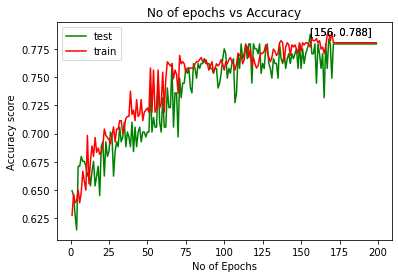

In [12]:
###  Peak of training and testing error touched when no of epochs = 156 and accuracy score= 0.788.
plt.plot(epochs,accuracy_test,color='g')
plt.plot(epochs,accuracy_train,color='r')
plt.title('No of epochs vs Accuracy')
plt.ylabel('Accuracy score')
plt.xlabel('No of Epochs')
plt.legend(labels=['test','train'])
plt.annotate(finallist1,xy=finallist1)
plt.annotate(finallist2,xy=finallist2)

155
[156, 0.212]
169
[170, 0.21]


''

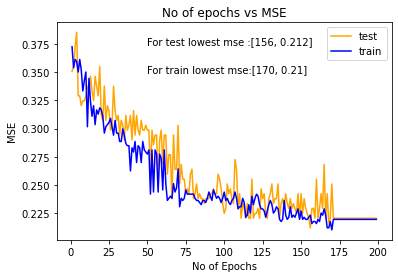

In [13]:
# MSE lowest for test
index_mse= mse_test.index(min(mse_test))
print(index_mse)
finallist= [epochs[155],round(mse_test[155],3)]
print(finallist)
# MSE lowest for train
index_mse_train= mse_train.index(min(mse_train))
print(index_mse_train)
finallist_train= [epochs[169],round(mse_train[169],3)]
print(finallist_train)

plt.plot(epochs,mse_test,color='orange')
plt.plot(epochs,mse_train,color='blue')

plt.title('No of epochs vs MSE')
plt.ylabel('MSE')
plt.xlabel('No of Epochs')

plt.annotate('For test lowest mse :'+ str(finallist),xy= finallist,xytext=(50,0.375))
plt.annotate('For train lowest mse:'+str(finallist_train),xy=finallist_train,xytext=(50,0.350))
plt.legend(labels=['test','train'])
;

In [14]:
### Hence the minimal mse for testing data is attained at 156th epoch and the value for mse : 0.212
### A the minimal mse for training data is attained at 170th epoch and the value for mse : 0.2

[0.10930995 0.23043073 0.09720183 0.07996884 0.07549186 0.14319823
 0.12047322 0.14392535]


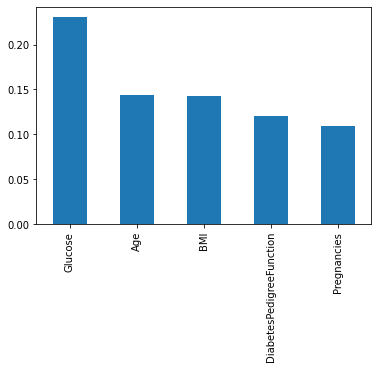

In [15]:
col_names= X.columns
col_names

# a) Pre-processing

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

X= sc.fit_transform(X)

X= pd.DataFrame(X,columns= col_names)
X

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='bar')
plt.show()




In [18]:
X= X[['Glucose','BMI','Age','DiabetesPedigreeFunction','Pregnancies']]
X

MLPClassifier()

from sklearn.model_selection import GridSearchCV

param_grid = {
  'activation':['relu','softmax','linear'],
    'learning_rate_init':[0.1,0.05,0.03,0.02],
    'max_iter':[100,200,50,20,30],
    'hidden_layer_sizes':[(6,5),(3,6),(4,2),(8,9),(50,60),(100,200)]
}

grid = GridSearchCV(clf, param_grid = param_grid, cv = 5, verbose = 5, n_jobs = -1)
grid.fit(X_train,y_train)

best_estimator = grid.best_estimator_

best_estimator

best_pred_y = best_estimator.predict(X_test)
print("Accuracy: {}%".format(accuracy_score(y_test, best_pred_y)*100))

### Hence the accuracy score is : 76.19%, which is better than the MLP model before data-preprocessing and hypertuning 

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1200 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 752, in fit
    return self._fit(X, y, incremental=False)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 427, in _fit
    self._fit_stochastic(
  File "/u

Iteration 1, loss = 11.58030216
Iteration 2, loss = 3.58741917
Iteration 3, loss = 2.30374157
Iteration 4, loss = 1.98224947
Iteration 5, loss = 1.78091299
Iteration 6, loss = 1.28869028
Iteration 7, loss = 1.12610291
Iteration 8, loss = 1.00073464
Iteration 9, loss = 0.80652535
Iteration 10, loss = 0.81114227
Iteration 11, loss = 0.77150121
Iteration 12, loss = 0.74501229
Iteration 13, loss = 0.72376546
Iteration 14, loss = 0.68231710
Iteration 15, loss = 0.66301803
Iteration 16, loss = 0.65002186
Iteration 17, loss = 0.63718215
Iteration 18, loss = 0.63088754
Iteration 19, loss = 0.61861063
Iteration 20, loss = 0.60301273
Iteration 21, loss = 0.59875216
Iteration 22, loss = 0.58812763
Iteration 23, loss = 0.58139141
Iteration 24, loss = 0.57245044
Iteration 25, loss = 0.56815673
Iteration 26, loss = 0.55235168
Iteration 27, loss = 0.55330371
Iteration 28, loss = 0.54322088
Iteration 29, loss = 0.53705311
Iteration 30, loss = 0.53287977
Iteration 31, loss = 0.53606653
Iteration 32, lo

MLPClassifier(hidden_layer_sizes=(8, 9), learning_rate_init=0.02,
              random_state=5, verbose=True)

### Example

In [2]:
# Neural network has been implemented from basics without use of any framework like TensorFlow or sci-kit-learn.
# Training has been done on the MNIST dataset. Implementation has been done with minimum use of libraries to get a 
# better understanding of the concept and working on neural nets.

from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt

In [3]:
# The Neural Net will work better when the X values are between 0 and 1 in this case, 
# and we need to turn the Y values (integers between 0 and 9) into categorical, 
# because at the end we want the probabilities of every image being each number.

xx , yy = fetch_openml('mnist_784', version=1, return_X_y=True)
X = xx
Y = yy
X = np.array(X.values/255) #Bring X values between 0 and 1 by dividing X by 255
Y = np.array(Y.values) #The target, it is a vector of numbers between 0 and 9
m = X.shape[0]  #number of images
n = X.shape[1] + 1  #number of pixels in each image, +1 because of the bias 
X = np.concatenate((np.ones([m,1]),X), axis=1) # Adding the column of 1's for supporting the bias
Y = Y.astype(np.int64)
cat = np.zeros([m,10])

# We need to turn Y into a categorical matrix:

for ind, num in enumerate(Y):
    cat[ind][num] = 1
Y = cat # Y is now cathegorical-> ex: 3 = [0,0,0,1,0,0,0,0,0,0]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state=42) 

The following methodology was adopted:

Functions for random initialization of weights and bias
Activation functions
Derivatives of the activation function
Function for Forwarding propagation
Backward propagation
The cost has been written separately and derivative has been found.

In [4]:
print('SHAPES:')
print(f'- X original: {X.shape[0]} x {X.shape[1]}')
print(f'- Y original: {Y.shape[0]} x {Y.shape[1]}')
print(f'- X Train: {x_train.shape[0]} x {x_train.shape[1]}')
print(f'- Y train: {y_train.shape[0]} x {y_train.shape[1]}')
print(f'- X Test: {x_test.shape[0]} x {x_test.shape[1]}')
print(f'- Y Test: {y_test.shape[0]} x {y_test.shape[1]}')

SHAPES:
- X original: 70000 x 785
- Y original: 70000 x 10
- X Train: 59500 x 785
- Y train: 59500 x 10
- X Test: 10500 x 785
- Y Test: 10500 x 10


8


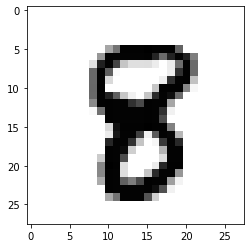

In [ ]:
NumeroAleatorio = np.random.randint(0,59500)
plt.imshow(np.reshape(x_train[NumeroAleatorio][1:], [28,28]), cmap='Greys')
print(np.argmax(y_train[NumeroAleatorio]))

In [20]:
class MNISTalgorithm:
    def __init__(self, estrutura, epochs=10, alpha=0.1, batch_size=0, Regularizer=0.0):
        self.tamanhos = [x for x in estrutura if isinstance(x, int)]
        self.ativações = [x.lower() for x in estrutura if isinstance(x, str)]
        self.inputs = [epochs,alpha,batch_size,Regularizer]
        self.epochs = epochs
        self.alpha = alpha
        self.Reg = Regularizer
        self.batch_size = batch_size
        self.Thetas = self.Initilization()
        self.CheckInputs()
    
    def Initilization(self):
        Thetas = {}
        for layer in range(len(self.tamanhos)-1):
            Thetas[f'T{layer+1}'] = np.random.randn(self.tamanhos[layer]+1, self.tamanhos[layer+1])/10
        return Thetas


    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))

    def dxsigmoid(self, z):
        return np.multiply(self.sigmoid(z),(1-self.sigmoid(z)))

    def softmax(self,x):
        x = np.array(x)
        e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return (e_x / e_x.sum(axis=1)[:,None])

    def Relu(self, x):
        return np.maximum(0,x)
    
    def dxRelu(self, x):
        return np.where(x >= 0, 1, 0)
    

    def Forward(self,X):

        X = np.matrix(X)
        m = X.shape[0]
        att = self.ativações
        Thetas = self.Thetas
        Forward_steps = {}
        Forward_steps['a1'] = X
        Ultimo_layer = int(len(self.tamanhos))
        for layer in range(1,Ultimo_layer):
            Forward_steps[f'z{layer+1}'] = np.dot(Forward_steps[f'a{layer}'], Thetas[f'T{layer}'])
            if att[layer-1] == 'sigmoid':
                Forward_steps[f'a{layer+1}'] = np.concatenate((np.ones([m,1]), self.sigmoid(Forward_steps[f'z{layer+1}'])), axis=1)
            elif att[layer-1] == 'softmax':
                Forward_steps[f'a{layer+1}'] = np.concatenate((np.ones([m,1]), self.softmax(Forward_steps[f'z{layer+1}'])), axis=1)
            elif att[layer-1] == 'relu':
                Forward_steps[f'a{layer+1}'] = np.concatenate((np.ones([m,1]), self.Relu(Forward_steps[f'z{layer+1}'])), axis=1)
            else:
                print("Error")
        
        h = Forward_steps.pop(f'a{Ultimo_layer}')
        Forward_steps['h'] = h[:,1:]
        
        return Forward_steps
        

    def CostFunction(self):
        Y = self.Y
        X = self.X
        Thetas = self.Thetas
        m = self.m
        Reg = self.Reg
        soma_weights = 0
        for i in range(len(Thetas)):
            weights = Thetas[f'T{i+1}']
            weights[0] = 0
            soma_weights += np.sum(weights**2)
        Forward_dict = self.Forward(X)
        h = Forward_dict['h']
        soma = np.sum((np.multiply(-Y , np.log(h)) - np.multiply((1-Y),(np.log(1-h)))))
        J = soma/m + (Reg/(2*m)) * soma_weights
        return J


    def Gradients(self,X,Y):
        X = np.matrix(X)
        Y = np.matrix(Y)
        m = X.shape[0]
        Thetas = self.Thetas
        n_layers = len(self.tamanhos)
        att = self.ativações
        Thetas_grad = []

        Forward_list = self.Forward(X)
        deltas = {}
        deltas[f'delta{n_layers}'] = Forward_list['h'] - Y # delta4
        for i in range(n_layers-1,1,-1):# 3 ... 2
            if att[i-2] == 'sigmoid':
                deltas[f'delta{i}'] = np.multiply((np.dot(deltas[f'delta{i+1}'],Thetas[f'T{i}'][1:].T)) , self.dxsigmoid(Forward_list[f'z{i}']))
            elif att[i-2] == 'relu':
                deltas[f'delta{i}'] = np.multiply((np.dot(deltas[f'delta{i+1}'],Thetas[f'T{i}'][1:].T)) , self.dxRelu(Forward_list[f'z{i}']))
        
        for c in range(len(deltas)):#0 ... 1 ... 2
            BigDelta = np.array(np.dot(deltas[f'delta{c+2}'].T, Forward_list[f'a{c+1}']))
            weights = Thetas[f'T{c+1}']
            weights[0] = 0
            grad = np.array(BigDelta + (self.Reg * weights.T))/m
            Thetas_grad.append(grad)
        return Thetas_grad #[T1_grad, T2_grad, T3_grad]


    def Precisao(self, X,Y):

        Forward_list = self.Forward(X)
        h = Forward_list['h']
        y_hat = np.argmax(h, axis=1)[:,None]
        y = np.argmax(Y, axis=1)[:,None]
        return np.mean(y_hat == y)


    def train(self, X, Y,x_test,y_test):

        Thetas = self.Thetas
        self.X = X
        self.Y = Y
        self.m = X.shape[0]
        j_history = []
        sec1 = time.time()
        if self.batch_size <= 0:
            b_size = self.m
            print(f'batch per shape {b_size}..')
        elif isinstance(self.batch_size, int) and (1<= self.batch_size <= self.m):
            b_size = self.batch_size
        else:
            return 
        for ep in range(self.epochs):
            m = self.m
            a = np.array([0,b_size])
            num = 1

            for i in range(m // b_size):
                inx = a + b_size*i
                grad_list = self.Gradients(X[inx[0]:inx[1]], Y[inx[0]:inx[1]])
                for g in range(len(grad_list)):
                    self.Thetas[f'T{g+1}'] = self.Thetas[f'T{g+1}'] - self.alpha*np.array(grad_list[g]).T
            
            if (ep+1) % num == 0: #
                J = self.CostFunction()
                j_history.append(J)
                accu_train = self.Precisao(X,Y)
                accu_test = self.Precisao(x_test,y_test)
                sec2 = time.time()
                tempo_gasto = sec2 - sec1
                print(f'Epoch: {ep+1}; Cost: {J:.5f}: Accuracy Train: {accu_train:.5%}; Accuracy Test: {accu_test:.5%}; Tempo Gasto: {tempo_gasto:.2f} s')
        return j_history, self.Thetas

In [12]:
model = MNISTalgorithm([784, 'relu', 200,'sigmoid',80, 'softmax', 10], epochs=10, alpha=0.1, batch_size=100)

In [15]:
j_history, trained_thetas = model.train(x_train,y_train,x_test,y_test)

Epoch: 1; Cost: 0.64065: Accuracy Train: 89.71092%; Accuracy Test: 89.61905%; Tempo Gasto: 9.07 s
Epoch: 2; Cost: 0.47077: Accuracy Train: 92.05714%; Accuracy Test: 92.03810%; Tempo Gasto: 17.12 s
Epoch: 3; Cost: 0.39149: Accuracy Train: 93.42689%; Accuracy Test: 93.13333%; Tempo Gasto: 27.79 s
Epoch: 4; Cost: 0.33755: Accuracy Train: 94.35462%; Accuracy Test: 93.97143%; Tempo Gasto: 42.28 s
Epoch: 5; Cost: 0.29692: Accuracy Train: 95.07227%; Accuracy Test: 94.43810%; Tempo Gasto: 55.03 s
Epoch: 6; Cost: 0.26534: Accuracy Train: 95.63866%; Accuracy Test: 94.89524%; Tempo Gasto: 64.47 s
Epoch: 7; Cost: 0.23980: Accuracy Train: 96.04706%; Accuracy Test: 95.20000%; Tempo Gasto: 77.90 s
Epoch: 8; Cost: 0.21843: Accuracy Train: 96.43361%; Accuracy Test: 95.37143%; Tempo Gasto: 91.91 s
Epoch: 9; Cost: 0.20030: Accuracy Train: 96.77143%; Accuracy Test: 95.65714%; Tempo Gasto: 100.61 s
Epoch: 10; Cost: 0.18462: Accuracy Train: 97.05882%; Accuracy Test: 95.99048%; Tempo Gasto: 110.56 s


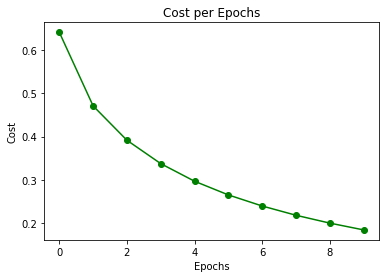

In [19]:
plt.plot(j_history, 'go-',label='Cost')
plt.title('Cost per Epochs')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

# Lab 5: Implementation of Convolution Neural Network